<a href="https://colab.research.google.com/github/fayez1990/2024_Intro_Python/blob/main/W4_S1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression, Classification, and Clustering with Scikit-learn

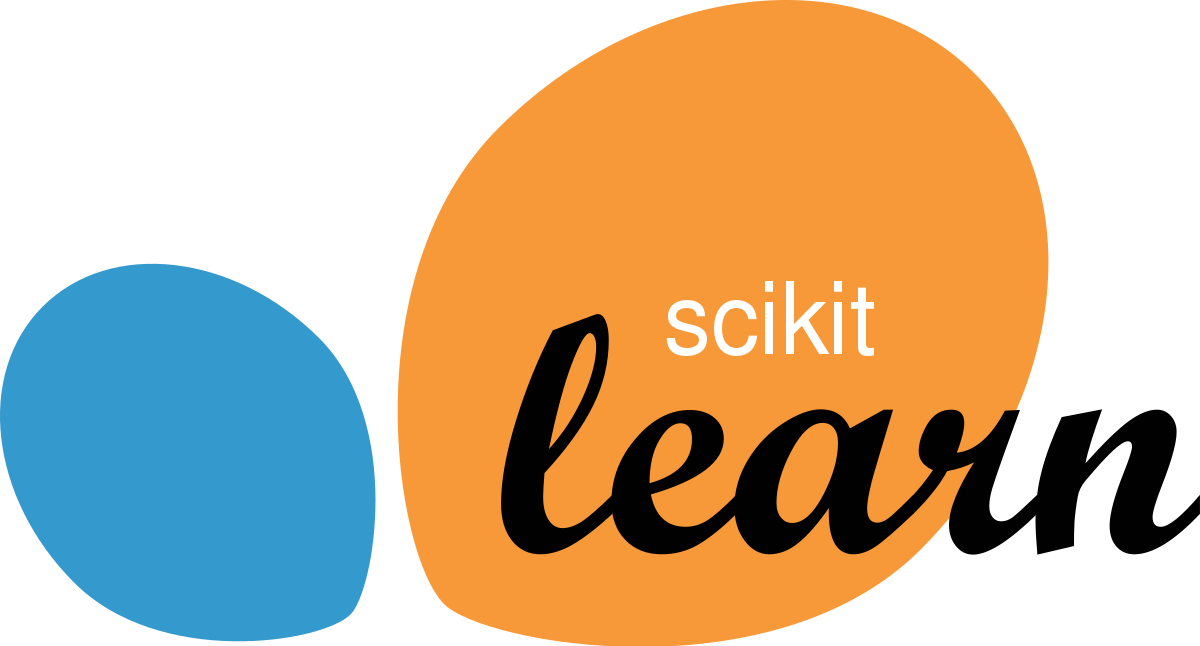

Today, we are going to introduce three pillars of statistical modeling:

1. *Regression*, which learns the relationship between continuous inputs (or predictors/features) and outputs (or predictands/targets), and

2. *Clustering*, which groups objects in similar clusters.

3. *Classification*, which learns which of a set of classes a new sample belongs to.

For all these tasks, we will use an easy-to-use and versatile Python library for statistical learning: [scikit-learn](https://scikit-learn.org/stable/).

## Linear Regression

Linear regression is arguably the simplest regression model.

Assuming you have some measurements $y $ of how one physical property depends on another physical property $x $, a linear regression predicts $w*x+b $, where $w $ is the slope and $b $ is the intercept. You can optimize $a $ and $b $ based on the data you collected using the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method of the [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object.

Reference:
1. Machine Learning Foundations and Practice (CS345_Colorado State University)

First, let's import the required libraries:

In [41]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pooch
import urllib.request

and create fake data to play with:

In [42]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(50)
y = 2 * x - 5 + rng.standard_normal(50)*2.5

In [ ]:
x

We just created 50 random data points in a vector ($x$), and assumed that $x$ is related to another vector $y$ via the following equation:
$y = 2x-5$

To mimic real observations, we add some normally-distributed noise (of magnitude 2.5) so that these "observations" do not exactly follow the equation.

Now let's see how the fake data looks like!

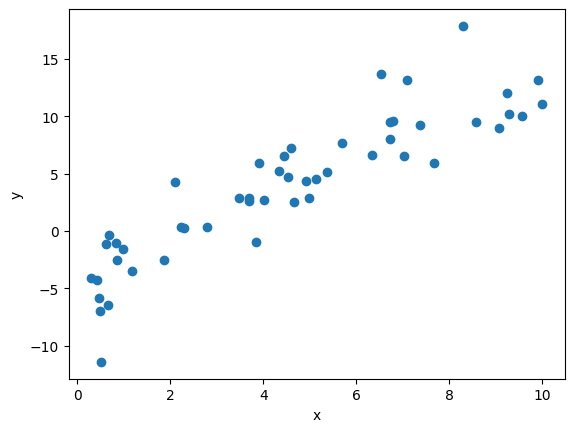

In [43]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we have data that only have information about $x $ and assume that the underlying relationship between $y$ and $x$ holds, we can plug in the observed $x$ into the equation to get the corresponding $y$ value 😀

But can we find this equation $y = 2x-5$ from data?

This is where **regression** comes in.

In one dimension, linear regression takes the following form:

$$
\large
y =  wx + b
$$

$w$ and $b$ are the **model parameters** we would like to optimize based on the data we currently have. Once we have the equation, we can use it to make predictions on new data (e.g., the examples we just discussed)

Fortunately, we do not need to code the model optimization and parameters finding procedure from scratch! We can just use the pre-packaged sklearn [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) functions instead.

Let's try it out!

In [44]:
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
# (Reshape your data either using array.reshape(-1, 1) if your data has a single feature
# or array.reshape(1, -1) if it contains a single sample.)
linreg = LinearRegression()
linreg.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred = linreg.predict(x.reshape(-1,1))



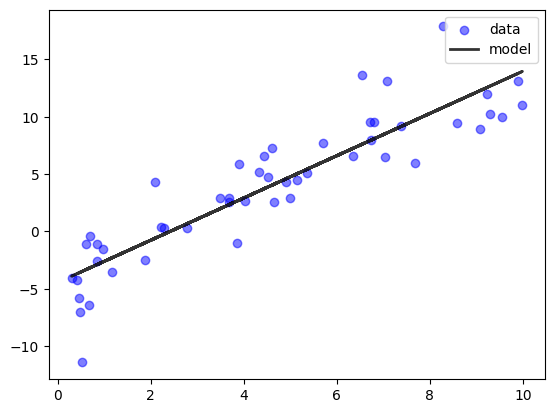

In [45]:
# plot the reslts
plt.scatter(x, y,  color='blue', alpha=0.5, label = 'data')
plt.plot(x, y_pred, color='black', alpha=0.8,linewidth=2, label = 'model')
plt.legend(loc="best")
plt.show()

This is what the optimized parameters look like. The values are not exactly what we defined originally, but it's in the same ballpark.

In [46]:
#print(f"Model Prediction:{linreg.predict(np.asarray(2).reshape(1,-1))}")
#print(f"Real:{2*2-5}")
print(f"The calculated slope w is {np.round(float(linreg.coef_),decimals=2)}\
, while the calculated intercept b is {np.round(float(linreg.intercept_),decimals=2)}")

The calculated slope w is 1.84, while the calculated intercept b is -4.44


<ipython-input-46-bd81c00bf314>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The calculated slope w is {np.round(float(linreg.coef_),decimals=2)}\
<ipython-input-46-bd81c00bf314>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  , while the calculated intercept b is {np.round(float(linreg.intercept_),decimals=2)}")


One way to get a more accurate model is to collect more data. The model parameters are significantly more accurate when we use 10000 data points to train the regression model.

In [47]:
seed = 40001
rng = default_rng(seed)
x = 10*rng.random(10000)
y = 2 * x - 5 + rng.standard_normal(10000)*2.5
linregN = LinearRegression()
linregN.fit(x.reshape(-1,1), y.reshape(-1,1))
print(f"The calculated slope w is {np.round(float(linregN.coef_),decimals=2)}\
, while the calculated intercept b is {np.round(float(linregN.intercept_),decimals=2)}")

The calculated slope w is 2.0, while the calculated intercept b is -4.97


<ipython-input-47-05ae051c0d4b>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The calculated slope w is {np.round(float(linregN.coef_),decimals=2)}\
<ipython-input-47-05ae051c0d4b>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  , while the calculated intercept b is {np.round(float(linregN.intercept_),decimals=2)}")


How are the model parameters derived? In the scikit-learn package, the least-squared method is used.

The parameters $(w,b)$ are chosen as to minimize the sum-squared error (using singular value decomposition so there's a unique solution):
$$
J( w,b ) = \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$

where $y_i$ are the known labels and $\hat{y}_i = w x_i + b$ are the predicted labels. So the function actually repeats the model prediction multiple times with different `w` and `b`, and ultimately settles on the combination that minimizes the `J`.

## Clustering
Now that we have introduced how to use regression tools to find linear relationships in data, we can make predictions, e.g., in new situations or to "fill in" incomplete data.

However, there are some data analysis tasks for which it would not make sense to use regression tools. For example, imagine we have a large quantity of unlabeled data with penguins' physical characteristics 🐧 We want to find the optimal way to separate the data into distinct clusters. Each cluster will then represent one specific type of penguins. This ***clusering analysis task*** can be helpful when we try to interpret a complex, high-dimensional dataset.

Here, we will introduce some algorithms that specifically deal with clustering tasks.

Reference:
1. Python Data Science Handbook
2. UC Davis - AIX0008 (Introduction to Data Science, summer 2022)
3. Tutorial for R package (clusterpval; https://www.lucylgao.com/clusterpval/index.html)

### K-means clustering
There is a large number of clustering algorithms, some of which are listed [at this link](https://scikit-learn.org/stable/modules/clustering.html). Among them, *K-means* clustering is the most commonly-used algorithm: it tries to separate data points in an unlabeled multidimensional space based on a pre-determined number of clusters.

The first step in the *K-means* algorithms label data involves K different randomly-initiated centroid points in the data. Based on distance comparison, we will get a first guess of how data points are distributed in the clusters.This separation is not optimal. Therefore, the *k*-means algorithm optimizes by iteratively updating the centroid locations. After the first iteration, centroids are moved to the mean coordinates of different clusters. The process is repeated until the solution converges.

Once the solution converges, each point is closer to its own cluster center than to the other cluster centers.

Here is a visual depiction of the algorithm from the "Python Data Science Handbook"

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1" width="1000">

First, let's generate a fake two-dimensional dataset containing four distinct blobs to see how the algorithm works.

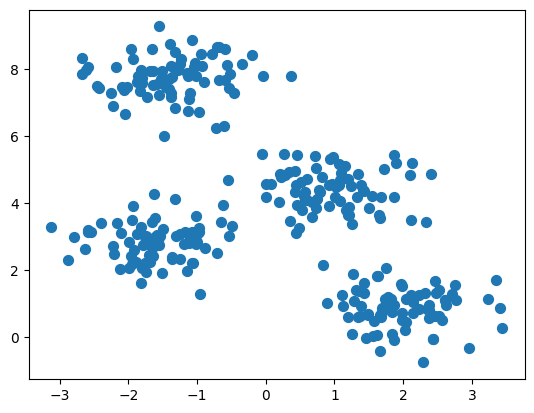

In [48]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

The K-Means algorithm is available in the [cluster package of the scikit-learn library](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)!

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

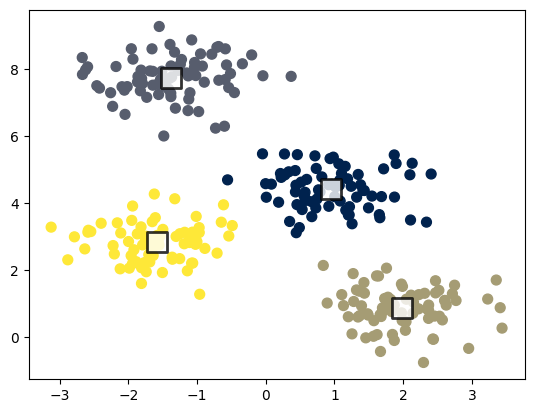

In [50]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cividis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.8,edgecolors='k',linewidths=2,marker='s')
plt.show()

Neat! Now let's move to a real environmental dataset 🧊 🌊 🐧

### Palmer Penguin Dataset

In this tutorial, we will discuss how to apply clustering tools to a real dataset. The dataset we will be using is the **Palmer Penguin Dataset** (collected by Kristen Gorman).

This dataset contains 344 entries of the physical attributes of penguins residing in the Palmer Archipelego, Antarctica. These penguins belong to three different species.

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="400">

Let's start by reading the dataset and quickly visualizing it.

In [51]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

In [52]:
import pandas as pd
penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


The [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method drops NaN values.

In [53]:
penguin_df = (penguins.dropna())
penguin_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [55]:
penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm']

,flipper_length_mm
0,181.0
1,186.0
2,195.0
4,193.0
5,190.0
...,...
147,184.0
148,195.0
149,193.0
150,187.0


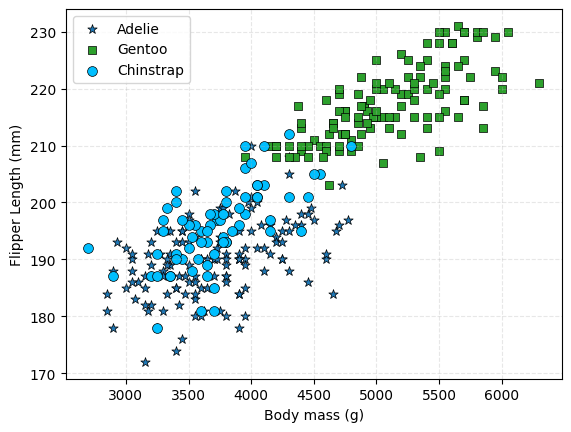

In [54]:
Adelie, Gentoo, Chinstrap = penguin_df[penguin_df['species']=='Adelie'], penguin_df[penguin_df['species']=='Gentoo'], \
penguin_df[penguin_df['species']=='Chinstrap']

plt.scatter(Adelie['body_mass_g'], Adelie['flipper_length_mm'],s=50,marker='*',label='Adelie',c='#1f77b4',edgecolors='k',linewidths=0.5)
plt.scatter(Gentoo['body_mass_g'], Gentoo['flipper_length_mm'],s=30,marker='s',label='Gentoo',c='#2ca02c',edgecolors='k',linewidths=0.5)
plt.scatter(Chinstrap['body_mass_g'], Chinstrap['flipper_length_mm'],s=50,marker='o',label='Chinstrap',c='deepskyblue',edgecolors='k',linewidths=0.5)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body mass (g)')
plt.legend()
plt.show()


Let's try to use k-means clustering to separate our data.

Since we know that there are three types of penguins in the dataset, we will ask the algorithm to identify 3 clusters for us by giving it the `n_clusters=3` argument.

In [59]:
import numpy as np
X = np.vstack((penguin_df['body_mass_g'],penguin_df['flipper_length_mm'])).T


In [58]:
X.shape

(334, 2)

In [60]:
# Call Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [62]:
penguin_df['label'] = y_kmeans

<ipython-input-62-444be8980540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df['label'] = y_kmeans


In [61]:
plt.scatter(penguin_df[penguin_df['species']=='Adelie']['body_mass_g'], penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['body_mass_g'], penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['body_mass_g'], penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body mass (g)')
plt.legend()
plt.show()

KeyError: 'label'

The K-Means clustering algorithm successfully separated our data into three distinct categories. But as we can see, there is an abrupt transition between the black and yellow clusters around `body_mass_g=5000`.

When we compare the results to our labels, we see a lot of mismatches between the assigned clusters and penguin species, especially the black and gray clusters.

What if we change the desired cluster number to 2?

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
penguin_df['label2'] = y_kmeans

In [ ]:
plt.scatter(penguin_df[penguin_df['species']=='Adelie']['body_mass_g'], penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label2'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['body_mass_g'], penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label2'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['body_mass_g'], penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label2'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body mass (g)')
plt.legend()
plt.show()

The clustering results now look much more natural than before. This suggests that `n_clusters=2` is probably the most appropriate number of clusters for the `body_mass_g`-`flipper_length_mm` 2D plane.

### Find the most appropriate cluster number in an objective way
There are several ways to find the most appropriate number of clusters for a given dataset. The first is the so-called `elbow curve method`.

The basic idea behind this method is that when clusters contain data points that should not be included, the distance between these data points and the cluster centroids will be very large!

We can visualize the change in these distances with number of clusters.

#### Elbow Method

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K,Sum_of_squared_distances,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

Using the "elbow method", the optimal number of clusters occur between `n_clusters`$=1$, for which the sum of squared distance is very large, and `n_clusters`$>4$, for which the sum of squared distance starts to saturate, i.e., decrease very slowly.

From this analysis, it is difficult to say whether `n_clusters`$=2$ or `n_clusters`$=3$ is more suitable to cluster the penguin dataset.

To objectively pinpoint the optimal number of clusters, we can use **silhouette analysis**, based on the silhouette score $S$, defined for a cluster $i$ as:

$S(i) = \frac{b(i)-a(i)}{max(a(i),b(i)}$,

where:

- `a(i)` is the distance between the cluster centroid and all data points **within** the corresponding cluster
- `b(i)` is the distance between the cluster centroid and all data points **outside** of the corresponding cluster

We perform silhouette analysis for each cluster and average the `S(i)`, thus obtaining a single silhouette score for a given number of cluster `n_clusters`.

#### Silhouette Analysis

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range(2,10),silhouette_avg,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

The silhouette score should be as large as possible. An average silhouette score `Savg` close to zero means that the clusters are not compact and overlap with each other.

From the plot above, it seems like `n_clusters`=2 is an optimal `n_clusters` number.

**But can it really help us separate the different penguins? It doesn't seem so, at least based on the body mass and flipper length 😞**

In [ ]:
Adelie, Gentoo, Chinstrap = penguin_df[penguin_df['species']=='Adelie'], penguin_df[penguin_df['species']=='Gentoo'], \
penguin_df[penguin_df['species']=='Chinstrap']

plt.scatter(Adelie['body_mass_g'], Adelie['flipper_length_mm'],s=50,marker='*',label='Adelie',c='#1f77b4',edgecolors='k',linewidths=0.5)
plt.scatter(Gentoo['body_mass_g'], Gentoo['flipper_length_mm'],s=30,marker='s',label='Gentoo',c='#2ca02c',edgecolors='k',linewidths=0.5)
plt.scatter(Chinstrap['body_mass_g'], Chinstrap['flipper_length_mm'],s=50,marker='o',label='Chinstrap',c='deepskyblue',edgecolors='k',linewidths=0.5)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Body mass (g)')
plt.legend()
plt.show()


Indeed, Gentoo penguins are distinct from the other two penguin species, because they are heavier and have longer flippers. But it is very difficult to separate chinstraps or adelies in this 2-D plane.

This means that body mass and flipper lengths might not be the ideal combination to create clusters that represent penguin species.


In [ ]:
plt.scatter(Adelie['culmen_length_mm'], Adelie['flipper_length_mm'],s=50,marker='*',label='Adelie',c='#1f77b4',edgecolors='k',linewidths=0.5)
plt.scatter(Gentoo['culmen_length_mm'], Gentoo['flipper_length_mm'],s=30,marker='s',label='Gentoo',c='#2ca02c',edgecolors='k',linewidths=0.5)
plt.scatter(Chinstrap['culmen_length_mm'], Chinstrap['flipper_length_mm'],s=50,marker='o',label='Chinstrap',c='deepskyblue',edgecolors='k',linewidths=0.5)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

The figure above suggests that one way to separate the three penguin species is to look at the combination of the lengths of their bills and their flippers. In particular, the Chinstraps have similar flipper lengths compared to the Adelies, but their culmens are more comparable to the Gentoos.

In the exercise, we will try to repeat the k-means clustering analysis procedure shown above, but using this more appropriate 2D plane.

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

## Linear Classification

Another physical characteristic, namely the length of the bill, is very informative and can be used to separate adelies from chinstraps! 🐧

Here, we introduce a simple algorithm to classify the two penguins categories with scikit-learn, i.e., **logistic regression**.

(Reference: Scikit-learn tutorial [https://inria.github.io/scikit-learn-mooc/python_scripts/logistic_regression.html])

First let's use the `loc` attribute of the Pandas DataFrame to only keep the data for Adelies and Chinstraps.

In [ ]:
# only keep the Adelie and Chinstrap classes
penguins_small = penguin_df.set_index("species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["culmen_length_mm", "culmen_depth_mm"]
target_column = "species"

In [ ]:
penguins_small

Let's visualize the `culmen_length` and `culmen_depth` columns in the table.

In [ ]:
for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

We can see that when we look at the statistical distributions of the `culmen_length_mm` column, the Adelies are nicely concentrated in the figure's left-hand side, whereas Chinstraps are concentrated in the figure's right-hand side.

On the other hand, `culmen_depth_mm` seems to be not as useful in separating the two species of penguins.

We can phrase this problem as a binary classification. We include the `culmen_depth` and `culmen_depth` columns into a regression model that gives binary outputs. The model will only have two outcomes. One outcome will be *this penguin is an Adelie*, the other will be *this penguin is not an Adelie (a Chinstrap)*.

Scikit-learn conveniently includes a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module that is arguably the simplest way to do this task.

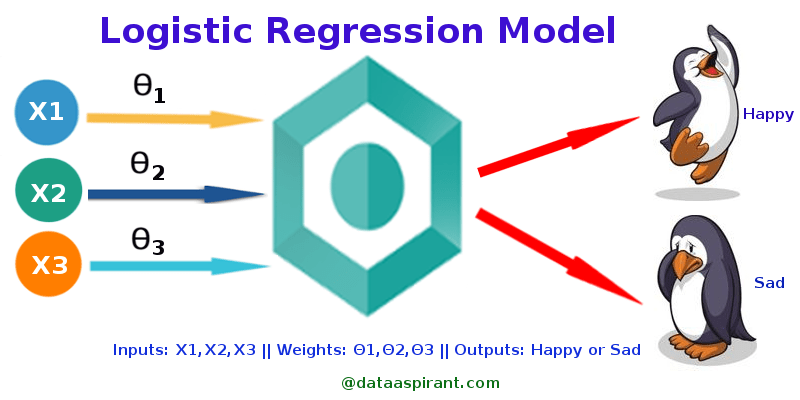

A well-behaved classification model should be able to correctly classify penguins not in the data table.

We ensure our model *generalizes well* by not using certain portions of the data when training the regression model.

In [ ]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins_small, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

Let's look at the data used as *inputs* of the model. Doing the `train_test_split` function can automatically separate the dataset into a larger dataframe **for training** and a smaller one **for testing**.

In [ ]:
data_train

Since `culmen_length_mm` is much larger than `culmen_depth_mm` (almost 2-3 times larger in fact), the weights of the model will be biased towards `culmen_length_mm`. We don't want this!

Here we use `StandardScaler` in scikit-learn to **standardize** the inputs. Standardization means removing the sample mean from each sample values and dividing it by the standard deviation of the samples.

$X_{standard} = \frac{X-mean(X)}{std(X)}$

In [ ]:
c_length_stand = (data_train['culmen_length_mm']-np.mean(data_train['culmen_length_mm']))/np.std(data_train['culmen_length_mm'])
c_depth_stand = (data_train['culmen_depth_mm']-np.mean(data_train['culmen_depth_mm']))/np.std(data_train['culmen_depth_mm'])

In [ ]:
print(np.min(c_length_stand),np.max(c_length_stand))
print(np.min(c_depth_stand),np.max(c_depth_stand))

In this tutorial, we redo what we just did with [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the two columns, and train a [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model for binary predictions.

Sklearn has a `make_pipeline` to streamline this process.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty=None)
)
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

And you can see, our model performs quite well in separating our penguins, only making a few misclassications.

But how did our model classify the samples? The way the model works is encoded in the `coef_` information in the regression model.

Let's visualize them!

In [ ]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=culmen_columns)

In [ ]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

In [ ]:
print(f"weights: {weights}\n")
print(f"intercept:{logistic_regression[-1].intercept_}")

This is actually the weights in a linear equation

$w1(culmen length)+w2(culmen depth)+intecept = 0$

In the trained model, this linear equation is actually:

$11.67(culmenlength)-4.18(culmendepth)-3.97 = 0$

The linear equation can separate the penguins quite nicely!

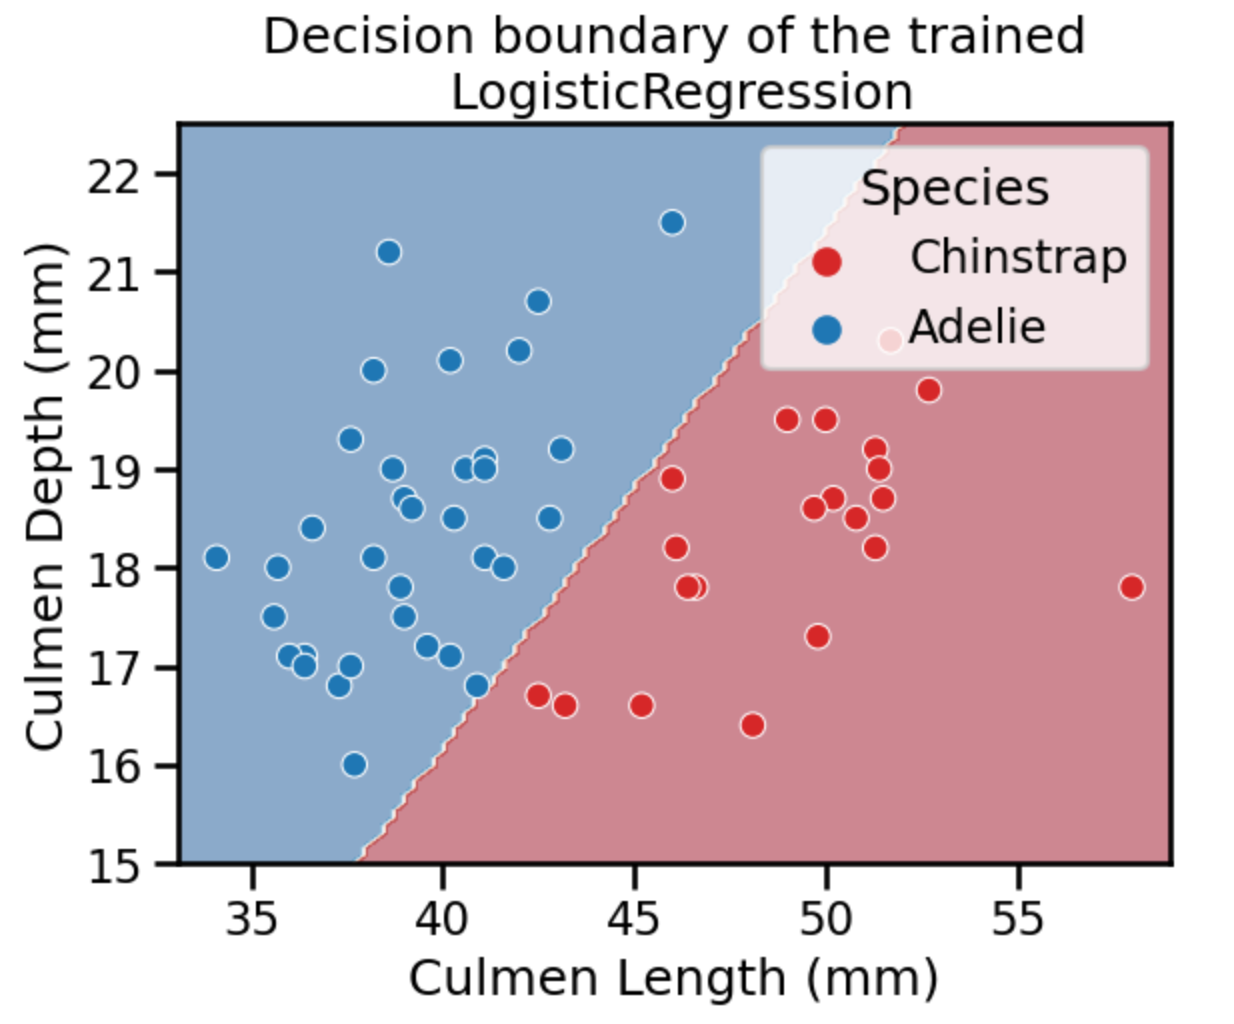